In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
%matplotlib inline

In [5]:
fpath_bloomberg = 'facebook_data_bloombergmarkets_post_sentiment_4dict.tsv'
post_data_bloomberg = pd.read_csv(fpath_bloomberg, sep='\t')
post_data_bloomberg["News_Agiency"] = 'Bloomberg'

fpath_businessinsider= 'facebook_data_businessinsider_post_sentiment_4dict.tsv'
post_data_businessinsider = pd.read_csv(fpath_businessinsider, sep='\t')
post_data_businessinsider["News_Agiency"] = 'Businessinsider'

fpath_CNN = 'facebook_data_CNN_post_sentiment_4dict.tsv'
post_data_CNN = pd.read_csv(fpath_CNN, sep='\t')
post_data_CNN["News_Agiency"] = 'CNN'

fpath_Forbes = 'facebook_data_Forbes_post_sentiment_4dict.tsv'
post_data_Forbes = pd.read_csv(fpath_Forbes, sep='\t')
post_data_Forbes["News_Agiency"] = 'Forbes'

fpath_FoxNews = 'facebook_data_FoxNews_post_sentiment_4dict.tsv'
post_data_FoxNews = pd.read_csv(fpath_FoxNews, sep='\t')
post_data_FoxNews["News_Agiency"] = 'FoxNews'

fpath_investorsbusinessdaily = 'facebook_data_investorsbusinessdaily_post_sentiment_4dict.tsv'
post_data_investorsbusinessdaily = pd.read_csv(fpath_investorsbusinessdaily, sep='\t')
post_data_investorsbusinessdaily["News_Agiency"] = 'investorsbusinessdaily'

fpath_nytimes = 'facebook_data_nytimes_post_sentiment_4dict.tsv'
post_data_nytimes = pd.read_csv(fpath_nytimes, sep='\t')
post_data_nytimes["News_Agiency"] = 'nytimes'

fpath_washingtonpost = 'facebook_data_washingtonpost_post_sentiment_4dict.tsv'
post_data_washingtonpost = pd.read_csv(fpath_washingtonpost, sep='\t')
post_data_washingtonpost["News_Agiency"] = 'washingtonpost'

fpath_WSJ = 'facebook_data_WSJ_post_sentiment_4dict.tsv'
post_data_WSJ = pd.read_csv(fpath_WSJ, sep='\t')
post_data_WSJ["News_Agiency"] = 'WSJ'

In [6]:
post_data = pd.concat([post_data_bloomberg
                      ,post_data_businessinsider
                      ,post_data_CNN
                      ,post_data_Forbes
                      ,post_data_FoxNews
                      ,post_data_investorsbusinessdaily
                      ,post_data_nytimes
                      ,post_data_washingtonpost
                      ,post_data_WSJ])
post_data.head()

,ID,PostID,PostDate,Text,Likes,Shares,WNPositive,WNNegative,WNNeutral,WNSentiment,...,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,News_Agiency
0,1,3.847873e+15,2021-05-16 00:03:09,BREAKING: Billionaire George Soros’s investmen...,0,0.0,0.250,0.625,16.125,-0.375,...,0.041667,0,2,24,-0.083333,0.047,0.108,0.846,-0.4404,Bloomberg
1,2,3.846793e+15,2021-05-15 16:09:27,LATEST: America’s millions of unused doses are...,0,0.0,0.125,1.250,8.625,-1.125,...,0.052632,1,1,19,0.000000,0.105,0.093,0.802,0.0772,Bloomberg
2,3,3.846326e+15,2021-05-15 12:34:37,Singapore's tourism industry is racing to catc...,0,0.0,0.375,0.000,12.625,0.375,...,0.000000,0,0,16,0.000000,0.000,0.000,1.000,0.0000,Bloomberg
3,4,3.845820e+15,2021-05-15 08:30:13,Asian stocks are falling further behind their ...,0,0.0,0.375,1.500,10.125,-1.125,...,-0.444444,0,1,9,-0.111111,0.000,0.222,0.778,-0.6908,Bloomberg
4,5,3.845620e+15,2021-05-15 06:41:53,"Taiwan, seen as a model for tackling Covid, ti...",0,0.0,0.500,0.250,15.250,0.250,...,-0.052632,0,2,19,-0.105263,0.000,0.000,1.000,0.0000,Bloomberg


In [7]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

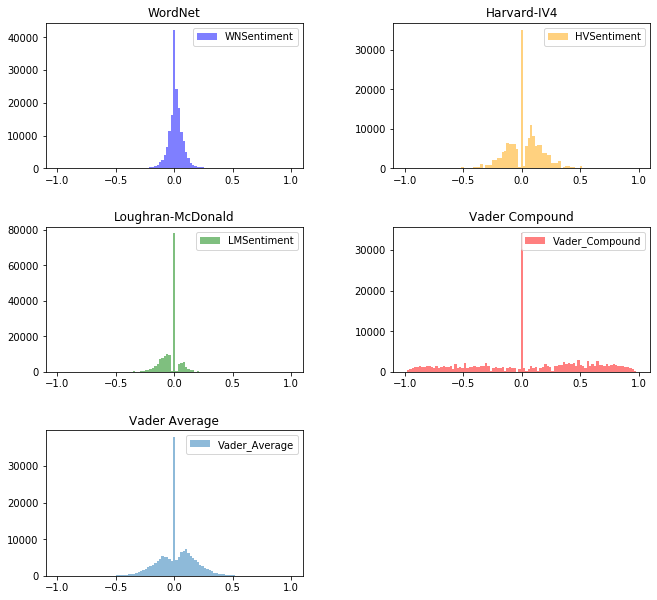

In [114]:
bins = np.linspace(-1, 1, 100)


pyplot.subplot(321)
pyplot.title('WordNet')
pyplot.hist(post_data['WNSentiAvg'], bins, alpha=0.5, label='WNSentiment', color = 'blue')
pyplot.legend(loc='upper right')

pyplot.subplot(322)
pyplot.title('Harvard-IV4')
pyplot.hist(post_data['HVSentiAvg'], bins, alpha=0.5, label='HVSentiment', color = 'orange' )
pyplot.legend(loc='upper right')

pyplot.subplot(323)
pyplot.title('Loughran-McDonald')
pyplot.hist(post_data['LMSentiAvg'], bins, alpha=0.5, label='LMSentiment', color = 'green')
pyplot.legend(loc='upper right')

pyplot.subplot(324)
pyplot.title('Vader Compound')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound', color = 'red')
pyplot.legend(loc='upper right')

pyplot.subplot(325)
pyplot.title('Vader Average')
pyplot.hist(post_data['Vader_Positive'] - post_data['Vader_Negative'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')



plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.5
                    , hspace=0.4,
                    wspace=0.35)

pyplot.savefig('PostDistribution.pdf',bbox_inches='tight')

pyplot.show()


Text(0, 0.5, 'Posts')

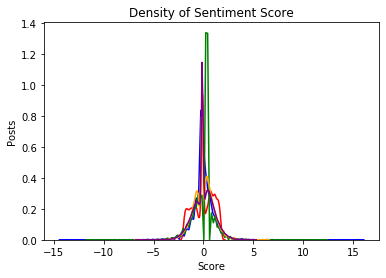

In [52]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['WNSentiAvg'] - post_data['WNSentiAvg'].mean())/post_data['WNSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['LMSentiAvg'] - post_data['LMSentiAvg'].mean())/post_data['LMSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['HVSentiAvg'] - post_data['HVSentiAvg'].mean())/post_data['HVSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Density of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [55]:
print(post_data[['WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].describe().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     WNSentiAvg &     HVSentiAvg &     LMSentiAvg &  Vader\_Compound &  Vader\_Average \\
\midrule
count &  163116.000000 &  163116.000000 &  163116.000000 &   163116.000000 &  163116.000000 \\
mean  &       0.011392 &       0.022858 &      -0.027736 &        0.052282 &       0.017953 \\
std   &       0.062200 &       0.154490 &       0.083827 &        0.506727 &       0.154931 \\
min   &      -0.875000 &      -1.000000 &      -1.000000 &       -0.992500 &      -1.000000 \\
25\%   &      -0.015625 &      -0.071429 &      -0.071429 &       -0.318200 &      -0.069000 \\
50\%   &       0.000000 &       0.000000 &       0.000000 &        0.000000 &       0.000000 \\
75\%   &       0.041667 &       0.117647 &       0.000000 &        0.475400 &       0.113000 \\
max   &       1.000000 &       1.000000 &       1.000000 &        0.998700 &       0.800000 \\
\bottomrule
\end{tabular}



In [118]:
pd.unique(post_data['News_Agiency'])

array(['Bloomberg', 'Businessinsider', 'CNN', 'Forbes', 'FoxNews',
       'investorsbusinessdaily', 'nytimes', 'washingtonpost', 'WSJ'],
      dtype=object)

In [123]:
print(post_data[['News_Agiency','WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']][
    (post_data['News_Agiency']  == 'Bloomberg')
    | (post_data['News_Agiency']  == 'Businessinsider')
    | (post_data['News_Agiency']  == 'CNN')
    | (post_data['News_Agiency']  == 'Forbes')
    | (post_data['News_Agiency']  == 'FoxNews')
].groupby('News_Agiency').describe().transpose().to_latex())

\begin{tabular}{llrrrrr}
\toprule
              & News\_Agiency &     Bloomberg &  Businessinsider &           CNN &        Forbes &       FoxNews \\
\midrule
WNSentiAvg & count &  12274.000000 &     19270.000000 &  18092.000000 &  20395.000000 &  18990.000000 \\
              & mean &      0.004533 &         0.014857 &      0.009066 &      0.016608 &      0.011063 \\
              & std &      0.061284 &         0.076854 &      0.056288 &      0.071051 &      0.051149 \\
              & min &     -0.541667 &        -0.625000 &     -0.625000 &     -0.812500 &     -0.875000 \\
              & 25\% &     -0.020833 &        -0.017857 &     -0.017094 &     -0.008929 &     -0.007812 \\
              & 50\% &      0.000000 &         0.000000 &      0.000000 &      0.005952 &      0.000000 \\
              & 75\% &      0.035714 &         0.050000 &      0.037500 &      0.048077 &      0.034091 \\
              & max &      0.410714 &         0.562500 &      0.750000 &      1.000000 &      0.

In [ ]:
post_data[['News_Agiency','WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].groupby('News_Agiency').describe().transpose()

In [15]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [117]:
x= [1, 2, 3]
5 in x

False

In [16]:
post_data['DateMonth'].head()

0    2021-05
1    2021-05
2    2021-05
3    2021-05
4    2021-05
Name: DateMonth, dtype: object

In [17]:
post_data.columns

Index(['ID', 'PostID', 'PostDate', 'Text', 'Likes', 'Shares', 'WNPositive',
       'WNNegative', 'WNNeutral', 'WNSentiment', 'WNTokenQnt', 'WNSentiAvg',
       'HVPositive', 'HVNegative', 'HVTokenQnt', 'HVSentiAvg', 'LMPositive',
       'LMNegative', 'LMTokenQnt', 'LMSentiAvg', 'Vader_Positive',
       'Vader_Negative', 'Vader_Neutral', 'Vader_Compound', 'News_Agiency',
       'Vader_Average', 'DateMonth', 'DateDay'],
      dtype='object')

In [18]:
Monthly_Data = post_data.groupby('DateMonth').agg({'WNSentiAvg': 'sum'
                                                         ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                       })

In [19]:
DailyData = post_data.groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })

In [20]:
DailyData['WNSentiment'] =  DailyData['WNSentiAvg']/ DailyData['WNTokenQnt']
DailyData['HVSentiment'] = (DailyData['HVPositive'] - DailyData['HVNegative'])/DailyData['HVTokenQnt']
DailyData['LMSentiment'] = (DailyData['LMPositive'] - DailyData['LMNegative'])/DailyData['LMTokenQnt']

Monthly_Data['WNSentiment'] =  Monthly_Data['WNSentiAvg']/ Monthly_Data['WNTokenQnt']
Monthly_Data['HVSentiment'] = (Monthly_Data['HVPositive'] - Monthly_Data['HVNegative'])/Monthly_Data['HVTokenQnt']
Monthly_Data['LMSentiment'] = (Monthly_Data['LMPositive'] - Monthly_Data['LMNegative'])/Monthly_Data['LMTokenQnt']



In [21]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['WNSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -9.7780
p-value                           0.0000
#Lags Used                       27.0000
Number of Observations Used    4516.0000
Critical Value (1%)              -3.4318
Critical Value (5%)              -2.8622
Critical Value (10%)             -2.5671
dtype: float64


In [22]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['HVSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -9.1236
p-value                           0.0000
#Lags Used                       27.0000
Number of Observations Used    4516.0000
Critical Value (1%)              -3.4318
Critical Value (5%)              -2.8622
Critical Value (10%)             -2.5671
dtype: float64


In [23]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['LMSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -9.1236
p-value                           0.0000
#Lags Used                       27.0000
Number of Observations Used    4516.0000
Critical Value (1%)              -3.4318
Critical Value (5%)              -2.8622
Critical Value (10%)             -2.5671
dtype: float64
Results of Dickey-Fuller Test:


In [24]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['Vader_Compound'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -9.8516
p-value                           0.0000
#Lags Used                       31.0000
Number of Observations Used    4512.0000
Critical Value (1%)              -3.4318
Critical Value (5%)              -2.8622
Critical Value (10%)             -2.5671
dtype: float64
Results of Dickey-Fuller Test:


In [25]:
DailyData.head()

,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
DateDay,,,,,,,,,,,,,
2008-07-17,0.053571,1,0.0,0.0,0,0,6,0,0,6,0.053571,0.000000,0.0
2008-07-21,0.011905,1,0.0,0.0,3,1,28,0,0,28,0.011905,0.071429,0.0
2008-08-12,0.312500,1,0.0,0.0,1,1,4,0,0,4,0.312500,0.000000,0.0
2008-08-13,0.000000,1,0.0,0.0,0,0,5,0,0,5,0.000000,0.000000,0.0
2008-08-14,0.049107,2,0.0,0.0,1,0,7,0,0,7,0.024554,0.142857,0.0


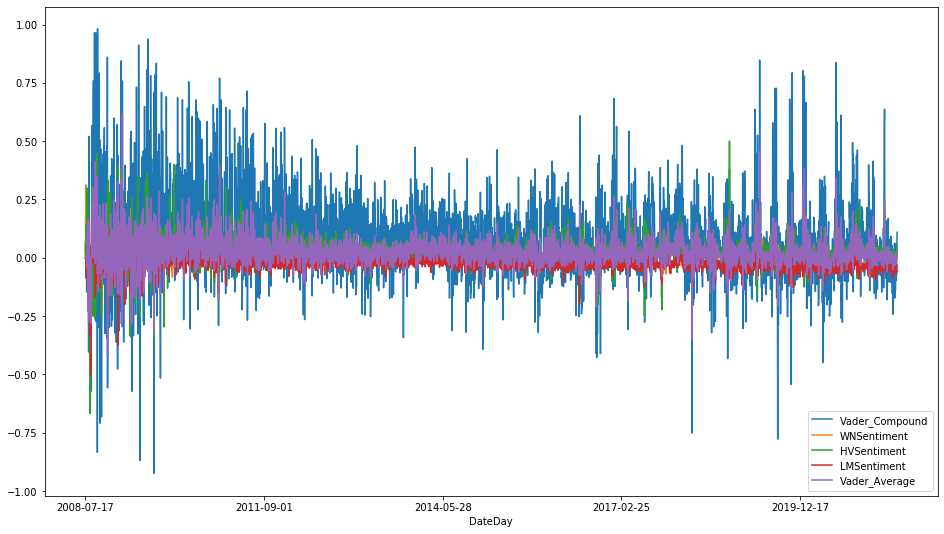

In [65]:
DailyData[['Vader_Compound','WNSentiment','HVSentiment','LMSentiment','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [91]:
SnP_daily = web.get_data_yahoo('^GSPC','06/01/2012','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','06/01/2012','05/01/2021',interval='m')

In [92]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [93]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [94]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [95]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [96]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    print ("\nGranger causality results of indep onto dep")
    results = grangercausalitytests(data, maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = grangercausalitytests(data, maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)

In [97]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [98]:
Granger_data_daily.head()

,High,Low,Open,Close,Volume,Adj Close,LogReturn,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
2012-06-01,1309.869995,1277.250000,1309.869995,1278.040039,4669350000,1278.040039,NaN,0.031660,23,0.059087,0.010957,63,25,418,13,16,418,0.001377,0.090909,-0.007177
2012-06-04,1282.550049,1266.739990,1278.290039,1278.180054,4011960000,1278.180054,0.000110,-0.015944,27,0.112241,0.013222,73,46,481,11,20,481,-0.000591,0.056133,-0.018711
2012-06-05,1287.619995,1274.160034,1277.819946,1285.500000,3403230000,1285.500000,0.005711,0.566021,31,-0.041242,-0.008839,83,60,675,17,28,675,0.018259,0.034074,-0.016296
2012-06-06,1315.130005,1285.609985,1285.609985,1315.130005,4268360000,1315.130005,0.022788,0.141174,34,0.013056,-0.006529,69,53,578,13,23,578,0.004152,0.027682,-0.017301
2012-06-07,1329.050049,1312.680054,1316.150024,1314.989990,4258140000,1314.989990,-0.000106,0.843166,35,0.048334,0.021371,98,47,657,8,29,657,0.024090,0.077626,-0.031963


In [99]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [124]:
Vars = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]
for Var in Vars:
    print("\n" + Var + "\n")
    grangerTest(Granger_data_daily[Var][1:], Granger_data_daily['LogReturn'][1:])


Vader_Compound



C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Optimal number of lags for exog data is 4
Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0151  , p=0.1559  , df_denom=2237, df_num=1
ssr based chi2 test:   chi2=2.0178  , p=0.1555  , df=1
likelihood ratio test: chi2=2.0169  , p=0.1556  , df=1
parameter F test:         F=2.0151  , p=0.1559  , df_denom=2237, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9779  , p=0.3763  , df_denom=2234, df_num=2
ssr based chi2 test:   chi2=1.9601  , p=0.3753  , df=2
likelihood ratio test: chi2=1.9592  , p=0.3755  , df=2
parameter F test:         F=0.9779  , p=0.3763  , df_denom=2234, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6212  , p=0.6013  , df_denom=2231, df_num=3
ssr based chi2 test:   chi2=1.8694  , p=0.6000  , df=3
likelihood ratio test: chi2=1.8686  , p=0.6001  , df=3
parameter F test:         F=0.6

Optimal number of lags for exog data is 5
Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8594  , p=0.3540  , df_denom=2237, df_num=1
ssr based chi2 test:   chi2=0.8606  , p=0.3536  , df=1
likelihood ratio test: chi2=0.8604  , p=0.3536  , df=1
parameter F test:         F=0.8594  , p=0.3540  , df_denom=2237, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9386  , p=0.1442  , df_denom=2234, df_num=2
ssr based chi2 test:   chi2=3.8858  , p=0.1433  , df=2
likelihood ratio test: chi2=3.8824  , p=0.1435  , df=2
parameter F test:         F=1.9386  , p=0.1442  , df_denom=2234, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3585  , p=0.2537  , df_denom=2231, df_num=3
ssr based chi2 test:   chi2=4.0882  , p=0.2521  , df=3
likelihood ratio test: chi2=4.0844  , p=0.2525  , df=3
parameter F test:         F=1.3

Optimal number of lags for exog data is 6
Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1025  , p=0.1472  , df_denom=2237, df_num=1
ssr based chi2 test:   chi2=2.1053  , p=0.1468  , df=1
likelihood ratio test: chi2=2.1044  , p=0.1469  , df=1
parameter F test:         F=2.1025  , p=0.1472  , df_denom=2237, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9791  , p=0.3758  , df_denom=2234, df_num=2
ssr based chi2 test:   chi2=1.9627  , p=0.3748  , df=2
likelihood ratio test: chi2=1.9618  , p=0.3750  , df=2
parameter F test:         F=0.9791  , p=0.3758  , df_denom=2234, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6258  , p=0.5983  , df_denom=2231, df_num=3
ssr based chi2 test:   chi2=1.8834  , p=0.5970  , df=3
likelihood ratio test: chi2=1.8826  , p=0.5971  , df=3
parameter F test:         F=0.6

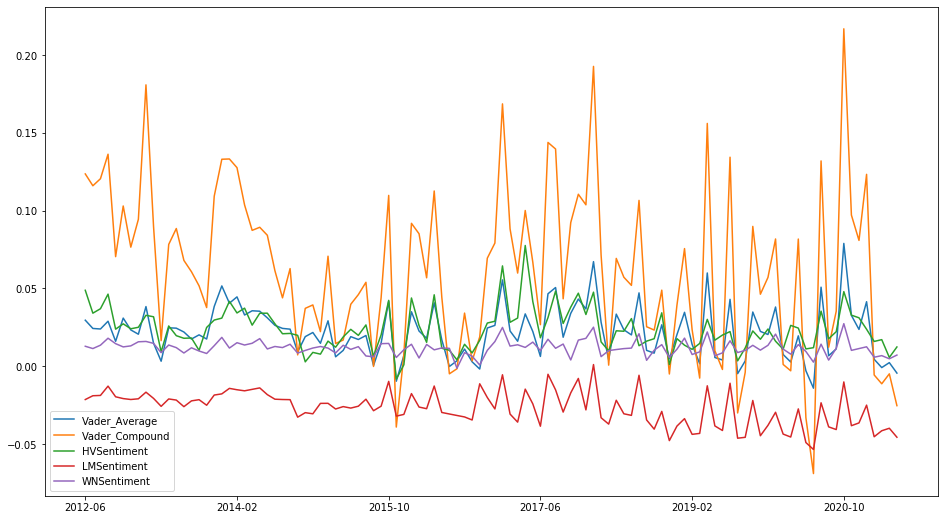

In [132]:
Granger_data_monthly[['Vader_Average','Vader_Compound','HVSentiment','LMSentiment','WNSentiment']].plot(legend=True, figsize=(16,9))

In [128]:
corr = Granger_data_daily[["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment","LogReturn"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Vader_Average,WNSentiment,HVSentiment,LMSentiment,LogReturn
Vader_Compound,1.000000,0.933251,0.431567,0.543708,0.576672,0.072330
Vader_Average,0.933251,1.000000,0.430729,0.497198,0.545471,0.072691
WNSentiment,0.431567,0.430729,1.000000,0.328412,0.342289,0.034818
HVSentiment,0.543708,0.497198,0.328412,1.000000,0.545657,0.056702
LMSentiment,0.576672,0.545471,0.342289,0.545657,1.000000,0.050419
LogReturn,0.072330,0.072691,0.034818,0.056702,0.050419,1.000000


In [57]:
print(corr.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Vader\_Compound &  Vader\_Average &  WNSentiment &  HVSentiment &  LMSentiment &  LogReturn \\
\midrule
Vader\_Compound &        1.000000 &       0.927962 &     0.427150 &     0.555710 &     0.561267 &   0.054700 \\
Vader\_Average  &        0.927962 &       1.000000 &     0.431879 &     0.500518 &     0.529093 &   0.059113 \\
WNSentiment    &        0.427150 &       0.431879 &     1.000000 &     0.335609 &     0.333420 &   0.042614 \\
HVSentiment    &        0.555710 &       0.500518 &     0.335609 &     1.000000 &     0.538442 &   0.037569 \\
LMSentiment    &        0.561267 &       0.529093 &     0.333420 &     0.538442 &     1.000000 &   0.040378 \\
LogReturn      &        0.054700 &       0.059113 &     0.042614 &     0.037569 &     0.040378 &   1.000000 \\
\bottomrule
\end{tabular}



In [133]:
pvals = [] 
for col in ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"])
#print(corr_signif.to_latex())
corr_signif

,p-value
Vader_Compound,0.000611
Vader_Average,0.000574
WNSentiment,0.099389
HVSentiment,0.007255
LMSentiment,0.016986


In [ ]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

In [89]:
DailyBusinessInsider = post_data[post_data['News_Agiency'] == 'Businessinsider'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
DailyBloomberg = post_data[post_data['News_Agiency'] == 'Bloomberg'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
DailyCNN = post_data[post_data['News_Agiency'] == 'CNN'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
DailyForbes = post_data[post_data['News_Agiency'] == 'Forbes'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
DailyFoxNews = post_data[post_data['News_Agiency'] == 'FoxNews'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
Dailyinvestorsbusinessdaily = post_data[post_data['News_Agiency'] == 'investorsbusinessdaily'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
Dailynytimes = post_data[post_data['News_Agiency'] == 'nytimes'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
Dailywashingtonpost = post_data[post_data['News_Agiency'] == 'washingtonpost'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })
DailyWSJ = post_data[post_data['News_Agiency'] == 'WSJ'].groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })

In [90]:
DailyDataByPublics = pd.merge(DailyBusinessInsider,DailyBloomberg, how = 'inner', left_index=True, right_index=True )
DailyDataByPublics.head()

,WNSentiAvg_x,WNTokenQnt_x,Vader_Compound_x,Vader_Average_x,HVPositive_x,HVNegative_x,HVTokenQnt_x,LMPositive_x,LMNegative_x,LMTokenQnt_x,WNSentiAvg_y,WNTokenQnt_y,Vader_Compound_y,Vader_Average_y,HVPositive_y,HVNegative_y,HVTokenQnt_y,LMPositive_y,LMNegative_y,LMTokenQnt_y
DateDay,,,,,,,,,,,,,,,,,,,,
2011-06-17,-0.068204,6,0.039567,0.041167,4,7,64,0,3,64,0.000000,4,0.124575,0.0330,3,1,50,1,0,50
2011-06-20,-0.050347,7,-0.020614,-0.010857,17,11,79,0,7,79,0.187500,1,0.636900,0.3180,2,0,5,0,0,5
2011-06-21,-0.165909,7,-0.399043,-0.130143,6,12,77,2,8,77,0.000000,2,-0.411250,-0.0945,1,3,31,0,0,31
2011-06-22,0.321875,8,0.077025,0.049000,11,12,88,3,6,88,0.086538,2,0.461400,0.1830,0,2,15,0,0,15
2011-06-23,0.001002,7,0.391314,0.115857,9,14,87,3,3,87,0.000613,2,0.473450,0.1575,5,3,28,0,1,28


In [79]:
DailyDataByPublics.index()

IndexError: too many indices for array